<a href="https://colab.research.google.com/github/jacmal/MachineLearning_Regression_Models/blob/main/Support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
import requests
import io

url="https://raw.githubusercontent.com/jacmal/MachineLearning_Regression_Models/main/data_sets/Position_Salaries.csv"
site = requests.get(url).content
dataset = pd.read_csv(io.StringIO(site.decode('utf-8')))

#dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.loc[:, "Level"].values
print(X)

[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
y = dataset.loc[:, "Salary"].values
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature Scaling

In [6]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

for i in zip(X, y):
  print(i)

(array([1]), array([45000]))
(array([2]), array([50000]))
(array([3]), array([60000]))
(array([4]), array([80000]))
(array([5]), array([110000]))
(array([6]), array([150000]))
(array([7]), array([200000]))
(array([8]), array([300000]))
(array([9]), array([500000]))
(array([10]), array([1000000]))


In [7]:
from sklearn.preprocessing import StandardScaler as SS
sc_X = SS()
sc_y = SS()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

for i in zip(X, y):
  print(i)

(array([-1.5666989]), array([-0.72004253]))
(array([-1.21854359]), array([-0.70243757]))
(array([-0.87038828]), array([-0.66722767]))
(array([-0.52223297]), array([-0.59680786]))
(array([-0.17407766]), array([-0.49117815]))
(array([0.17407766]), array([-0.35033854]))
(array([0.52223297]), array([-0.17428902]))
(array([0.87038828]), array([0.17781001]))
(array([1.21854359]), array([0.88200808]))
(array([1.5666989]), array([2.64250325]))


## Training the SVR model on the whole dataset

In [8]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [9]:
X_test = 6.5
y_pred = sc_y.inverse_transform(svr.predict(sc_X.transform([[X_test]])))
y_pred[0]

170370.02040650236

## Visualising the SVR results

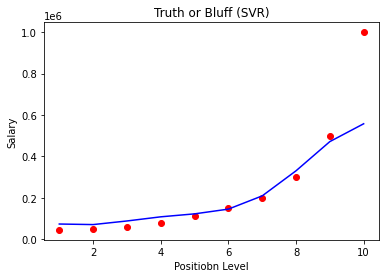

In [10]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X)), color='blue')
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Positiobn Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

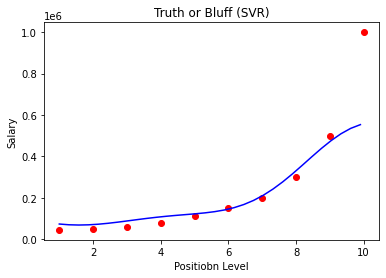

In [11]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(svr.predict(X_grid)), color='blue')
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Positiobn Level")
plt.ylabel("Salary")
plt.show()